In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Quiz**

In [42]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [3]:
data = np.array([
    [-1, -1],
    [-2, -1],
    [-1, -2],
    [0, 0],
    [2, 1],
    [2, 3]
])

In [33]:
#1
clust = AgglomerativeClustering().fit(data)
clust.labels_

array([0, 0, 0, 0, 1, 1], dtype=int64)

In [30]:
#2
clust = KMeans(n_clusters=2, init=np.array([[-1,-1], [0,0]])).fit(data)
clust.labels_

C:\Users\user1\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


array([0, 0, 0, 1, 1, 1])

In [37]:
#3
clust = DBSCAN(eps=2, min_samples=2).fit(data)
clust.labels_

array([0, 0, 0, 0, 1, 1], dtype=int64)

In [ ]:
#4
All points are grouped together into a single cluster

In [41]:
#5
round(silhouette_score(data, [0,0,0,1,1,1]), 2)

0.46

In [ ]:
#6
45

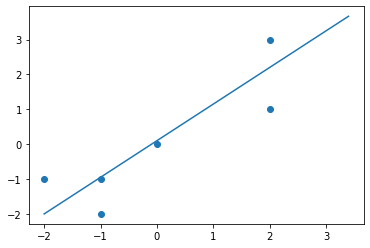

In [74]:
#7
pca = PCA(1).fit(data)
pca.components_
plt.scatter(data[:,0], data[:,1]);
plt.plot([-2, 0.67944959*5], [-2, 0.73372219*5]);

In [85]:
x = np.array([2,3])
y = np.array([0.67944959, 0.73372219])
round(np.sqrt(sum((y * np.dot(x, y) / np.dot(y, y))**2)), 2)

3.56

In [90]:
#8
[round(np.sqrt(sum((y * np.dot(i, y) / np.dot(y, y))**2)), 2) for i in data]

[1.41, 2.09, 2.15, 0.0, 2.09, 3.56]

In [ ]:
x₁ → -1.67, x₂ → -1.65, x₃ → -2.46, x₄ → 0.00, x₅ → 2.09, x₆ → 3.68
x₁ → -1.34, x₂ → -2.46, x₃ → -1.98, x₄ → 0.00, x₅ → 2.09, x₆ → 3.68 +
x₁ → -1.67, x₂ → -2.46, x₃ → -1.65, x₄ → 0.00, x₅ → 2.09, x₆ → 3.68
x₁ → -1.34, x₂ → -1.98, x₃ → -2.46, x₄ → 0.00, x₅ → 2.09, x₆ → 3.68

Каждый пункт, который предлагается выполнить в рамках домашнего задания, имеет объявленную "цену" в баллах. Максимально возможная сумма – 10 баллов, а с учётом бонусных пунктов – 12 баллов. Выполнять все пункты не обязательно, можно сделать только часть. В большинстве пунктов ожидается, что вы напишете работающий код на Python; иногда надо будет писать комментарии в свободной форме – например, сравнивать несколько подходов к решению одной задачи. Там, где оставлены пустые клетки под ваши ответы, вы можете по своему усмотрению добавлять ещё клетки.

* * *

Эта лабораторная работа посвящена кластеризации. Мы будем работать с рукописными изображениями цифр, научимся их кластеризовать двумя разными методами (иерархическая кластеризация и алгоритм $K$-means), оценивать качество разбиения и выбирать оптимальное число кластеров, а также визуализировать промежуточные результаты.

# 1. Получение данных

Данные, с которыми мы будем работать, доступны в библиотеке scikit-learn (модуль называется `sklearn`) в подмодуле `datasets` через функцию, которая называется `load_digits`. Всего имеется 1797 наблюдений, каждое из них представляет чёрно-белую картинку 8 $\times$ 8 пикселей. Эти картинки – распознанные рукописные цифры от 0 до 9. Образцов написания каждой цифры дано приблизительно поровну, около 180.

Для удобства использования данных каждая картинка "развёрнута" в строку, так что NumPy-массив, в котором хранятся данные, имеет размерность 2 и величину 1797 $\times$ 64 (а не, например, размерность 3 и величину 1797 $\times$ 8 $\times$ 8). Интенсивность цвета в каждом пикселе кодируется целым числом от 0 до 16.

Кроме наблюдений (картинок), известны соответствующие им значения целевой переменной: какую цифру на самом деле изображает каждая картинка. Мы могли бы сразу сформулировать задачу обучения с учителем и предсказывать цифры по картинкам, но для целей этой лабораторной работы мы будем действовать по-другому: сделаем вид, что нам не известны истинные метки классов (т. е. цифры) и даже количество классов, и попробуем сгруппировать данные таким образом, чтобы качество кластеризации оказалось наилучшим, а затем посмотрим, насколько точно полученные кластеры совпадают с группами изображений одинаковых цифр.

**(0.5 балла)** Загрузите данные. Добейтесь, чтобы в переменной `X` оказался массив наблюдений, содержащий 1797 $\times$ 64 числа, а в переменной `y` – массив истинных меток классов, содержащий 1797 чисел.

*Указания:*
- Как загрузить данные, объяснено в справке к функции `load_digits`.
- Размер массива хранится в атрибуте `shape`.

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
images = digits.images
target = digits.target
images.shape, target.shape

((1797, 8, 8), (1797,))

**(1 балл)** Визуализируйте первые десять картинок, расположив их на сетке 3 $\times$ 4 (в последнем ряду останутся пустые места). Добейтесь, чтобы фон картинок был белым, а изображения цифр – тёмными.

*Указания:*
- Не забудьте импортировать NumPy и Matplotlib.
- Картинки 8 $\times$ 8 можно либо достать готовыми из объекта, загруженного функцией `load_digits`, либо сделать самостоятельно из строк массива `X`. Во втором случае пользуйтесь методом `reshape`.
- Чтобы изображение не было цветным, можно вызвать функцию `plt.gray`, прежде чем начать рисовать.
- Располагать картинки на сетке умеет функция `plt.subplot`. Ознакомьтесь со справкой к ней.
- По умолчанию число 0 кодирует чёрный цвет, а число 16 – белый цвет. Подумайте, как обратить цвета одной операцией над NumPy-массивом.
- Выводить картинку на экран умеет функция `plt.imshow`. Ознакомьтесь со справкой к ней.
- Если считаете нужным, можете отключить сглаживание – параметр `interpolation` у функции `plt.imshow`.
- Если считаете нужным, можете отключить деления на координатных осях. За это отвечают функции `plt.xticks` и `plt.yticks`.

<Figure size 432x288 with 0 Axes>

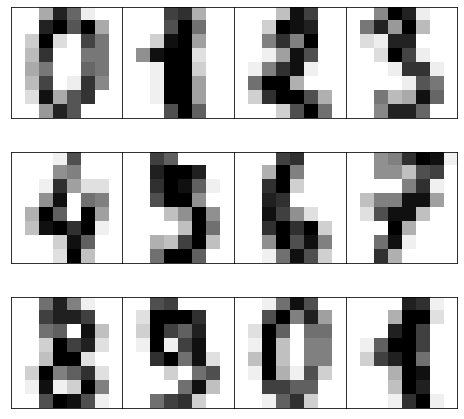

In [6]:
plt.gray()
fig, _ = plt.subplots(nrows=3, ncols=4, figsize=(8,8), gridspec_kw = {'wspace':0, 'hspace':0})

axes = fig.get_axes()
for ax, im in zip(axes, images):
    ax.set(xticks=[], yticks=[])
    ax.imshow(16-im, interpolation=None);

# 2. Кластеризация и оценка качества

Мы будем использовать два популярных алгоритма: иерархическую кластеризацию и метод $K$ средних ($K$-means clustering). Эти и другие алгоритмы кластеризации доступны в библиотеке scikit-learn в подмодуле `cluster`. Иерархическая кластеризация называется `AgglomerativeClustering`, а метод $K$ средних – `KMeans`.

Интерфейс у большинства алгоритмов в scikit-learn простой и единообразный:
- Чтобы инициализировать модель, нужно создать экземпляр соответствующего класса со всеми необходимыми параметрами. Например, у кластеризаций единственный обязательный параметр называется `n_clusters`, это количество кластеров, которое мы хотим получить на выходе.
- Инициализированную модель можно обучить, вызвав метод `fit`.
- С помощью обученной модели можно предсказывать, вызывая метод `predict`.

Как видно, этот интерфейс хорош только для задач обучения с учителем, в которых чётко разделены фазы обучения модели и предсказания с её помощью. У кластеризаций зато есть метод `fit_predict`, который разбивает входную выборку на кластеры и сразу же возвращает результаты разбиения.

**(0.5 балла)** Используя каждый из двух методов, иерархическую кластеризацию и $K$ средних, получите разбиение массива `X` на 10 кластеров.

*Указания:*
- Оба раза должен получиться массив из 1797 чисел – номеров кластеров.
- `KMeans` делает несколько (по умолчанию 10) запусков со случайными центрами и из полученных разбиений выводит лучшее в терминах среднего внутрикластерного расстояния. Чтобы улучшить качество предсказаний, можно увеличить число запусков, например, до 100. Это параметр `n_init` в конструкторе.

In [7]:
from sklearn.cluster import AgglomerativeClustering, KMeans

In [8]:
AC_pred = AgglomerativeClustering(n_clusters=10).fit_predict(digits.data)
KM_pred = KMeans(n_clusters=10).fit_predict(digits.data)

In [9]:
print(np.unique(AC_pred), np.unique(KM_pred), images.shape)

[0 1 2 3 4 5 6 7 8 9] [0 1 2 3 4 5 6 7 8 9] (1797, 8, 8)


**(1 балл)** Визуализируйте центры кластеров, полученных каждым из двух способов. Это опять должны быть картинки на сетке 3 $\times$ 4 с белым фоном и тёмными контурами. Прокомментируйте: какой из двух алгоритмов даёт центры кластеров, больше похожие на типичные начертания цифр?

*Указания:*
- Центр кластера – это среднее по всем наблюдениям, входящим в кластер, т. е. по какому-то набору строк из `X`.
- Чтобы выбрать наблюдения, входящие в кластер номер `i`, используйте индексацию по булевозначной маске. Саму маску можно получить из массива предсказанных номеров кластеров и числа `i` оператором `==`.
- Усреднять NumPy-массив вдоль какой-нибудь из осей умеет функция `np.mean`. Ознакомьтесь со справкой к ней. Нам нужно усреднение по строкам.

In [10]:
def plot_cluster_center(target):
    center = [digits.data[target == i].mean(axis=0) for i in np.unique(target)]

    fig, _ = plt.subplots(ncols=10, figsize=(20,20), gridspec_kw = {'wspace':0, 'hspace':0})
    axes = fig.get_axes()

    for ax, im in zip(axes, center):
        ax.set(xticks=[], yticks=[])
        ax.imshow(16-im.reshape(8, 8), interpolation=None)

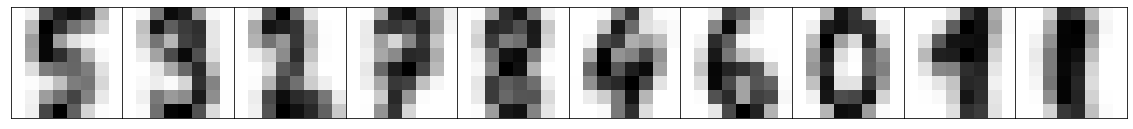

In [11]:
plot_cluster_center(AC_pred)

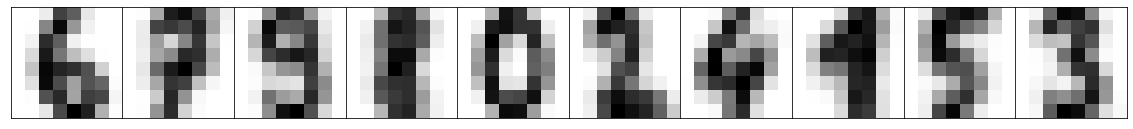

In [12]:
plot_cluster_center(KM_pred)

**In K-means output I can clearly read all digits from 0 to 9. However, despite looking similar, Agglomerative result feels kinda dizzy when you try to read it in ascending order.**

В ситуации, когда истинное число кластеров неизвестно, подбирают оптимальное число кластеров. При этом учитывают две величины: внутрикластерное расстояние (чем меньше, тем лучше) и межкластерное расстояние (чем больше, тем лучше). Так как две эти величины не достигают оптимума одновременно, обычно оптимизируют какой-нибудь функционал от них. Один популярный функционал называется "силуэт" (silhouette). Вот как он вычисляется.

Пусть $X$ – множество наблюдений, $M \subset X$ – один из кластеров, на которые оно разбито в результате кластеризации, $\rho$ – метрика на $X$. Выберем какое-нибудь одно наблюдение $x \in M$. Обозначим $a(x)$ среднее расстояние от $x$ до точек $x'$ из того же кластера:
$$
a(x) = \frac{1}{|M| - 1} \sum_{x' \in M,\, x' \ne x} \rho(x,\, x')
$$

Обозначим $b(x)$ минимум средних расстояний от $x$ до точек $x''$ из какого-нибудь другого кластера $N$:
$$
b(x) = \min_{N \ne M} \frac{1}{|N|} \sum_{x'' \in N} \rho(x,\, x'')
$$

Силуэт – это разность межкластерного и внутрикластерного расстояний, нормированная до отрезка $[-1,\, 1]$ и усреднённая по всем наблюдениям:
$$
\frac{1}{|X|} \sum_{x \in X} \frac{b(x) - a(x)}{\max(a(x),\, b(x))}
$$

В scikit-learn силуэт считается функцией `silhouette_score` из подмодуля `metrics`. На вход нужно передать массив наблюдений и результат кластеризации.

**(1.5 балла)** Для числа $K$ от 2 до 20 включительно получите разбиение массива `X` на $K$ кластеров каждым из двух методов. Посчитайте силуэт. Посчитанные значения силуэта сохраните в переменную и визуализируйте в виде графика в координатах: число $K$ – значение силуэта. При каком числе кластеров достигается максимум силуэта?

*Указания:*
- Не забудьте, что функция `range` не захватывает правый конец диапазона.
- Под значения силуэта можно завести два списка: один для иерархической кластеризации, другой для $K$ средних.
- Рисовать графики умеет функция `plt.plot`. Ознакомьтесь со справкой к ней.
- На одной картинке можно разместить несколько графиков, это просто несколько последовательных вызовов `plt.plot`.
- Чтобы добавить легенду (подписи к графикам), можно воспользоваться функцией `plt.legend`. Местоположение легенды контролируется параметром `loc`.
- Чтобы подписать координатные оси, можно воспользоваться функциями `plt.xlabel` и `plt.ylabel`.

In [39]:
from sklearn.metrics import silhouette_score
rng = range(2,21)

In [224]:
KM_predictions = [KMeans(k).fit_predict(digits.data) for k in rng]
AC_predictions = [AgglomerativeClustering(k).fit_predict(digits.data) for k in rng]

In [225]:
KM_scores = [silhouette_score(digits.data, prediction) for prediction in KM_predictions]
AC_scores = [silhouette_score(digits.data, prediction) for prediction in AC_predictions]

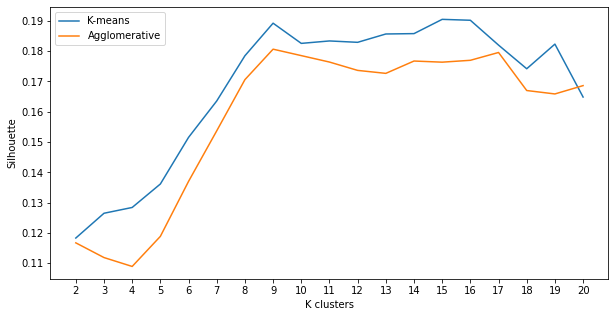

In [240]:
plt.figure(figsize=(10,5))
plt.xticks(rng)
plt.plot(rng, KM_scores)
plt.plot(rng, AC_scores)
plt.legend(['K-means', 'Agglomerative'])
plt.xlabel('K clusters')
plt.ylabel('Silhouette');

Когда известно "правильное" (в каком-нибудь смысле) разбиение на кластеры, результат кластеризации можно сравнить с ним, используя такие меры, как однородность (homogeneity), полнота (completeness) и их среднее гармоническое – $V$-мера. Определения этих величин довольно громоздкие и основаны на понятии [энтропии распределения вероятностей](https://ru.wikipedia.org/wiki/Информационная_энтропия); подробности излагаются в [этой статье](http://aclweb.org/anthology/D/D07/D07-1043.pdf). На практике достаточно знать, что однородность, полнота и $V$-мера заключены между нулём и единицей – чем больше, тем лучше.

Так как мы знаем, какую цифру на самом деле изображает каждая картинка (это массив `y`), мы можем использовать однородность, полноту и $V$-меру для оценки качества кластеризации. Функции для вычисления этих величин доступны в scikit-learn, в подмодуле `metrics`, под названиями `homogeneity_score`, `completeness_score`, `v_measure_score`. Как вариант, можно использовать функцию `homogeneity_completeness_v_measure`, которая возвращает сразу тройку чисел.

**(1 балл)** Повторите предыдущее задание, используя $V$-меру вместо силуэта. При каком числе кластеров достигается максимум $V$-меры?

In [38]:
from sklearn.metrics import v_measure_score

In [245]:
KM_scores = [v_measure_score(digits.target, prediction) for prediction in KM_predictions]
AC_scores = [v_measure_score(digits.target, prediction) for prediction in AC_predictions]

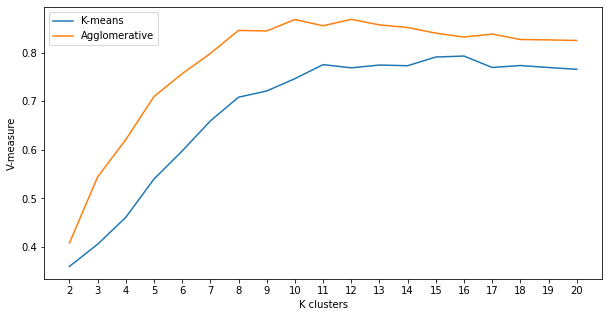

In [247]:
plt.figure(figsize=(10,5))
plt.xticks(rng)
plt.plot(rng, KM_scores)
plt.plot(rng, AC_scores)
plt.legend(['K-means', 'Agglomerative'])
plt.xlabel('K clusters')
plt.ylabel('V-measure');

**As in previous task, amount of clusters between 8 and 10 is the best for our metrics.**

# 3. Снижение размерности признакового пространства

Иногда, особенно когда признаков много и не все они одинаково информативные, бывает полезно снизить размерность признакового пространства, то есть вместо $d$ исходных признаков перейти к рассмотрению $d' \ll d$ новых признаков. Данные были представлены матрицей $n$ наблюдений $\times$ $d$ исходных признаков, а теперь будут представлены матрицей $n$ наблюдений $\times$ $d'$ новых признаков.

Есть два популярных подхода к снижению размерности:
- отобрать (select) новые признаки из числа имеющихся;
- извлечь (extract) новые признаки, преобразуя старые, например, сделать $d'$ различных линейных комбинаций столбцов исходной матрицы $n \times d$.

Одним из широко используемых методов извлечения признаков является сингулярное разложение матрицы (singular value decomposition, SVD). Этот метод позволяет сконструировать любое число $d' \le d$ новых признаков таким образом, что они будут, в определённом смысле, максимально информативными. Математические детали сейчас не важны; познакомиться с ними можно, например, [здесь](https://www.coursera.org/learn/mathematics-and-python/lecture/L9bCV/razlozhieniia-matrits-v-proizviedieniie-singhuliarnoie-razlozhieniie)
(по-русски) или [здесь](https://www.youtube.com/watch?v=P5mlg91as1c) (по-английски).

В scikit-learn есть несколько реализаций сингулярного разложения. Мы будем использовать класс `TruncatedSVD` из подмодуля `decomposition`. В конструктор этого класса достаточно передать один параметр `n_components` – желаемое число новых признаков. Метод `fit_transform` принимает матрицу и возвращает новую матрицу с таким же количеством строк, как прежде, и количеством столбцов, равным числу новых признаков.

<u>Замечание:</u> Сингулярное разложение матрицы $M$ обычно пишут в виде $M = U \Sigma V^{*}$, где $U$, $\Sigma$ и $V$ – некие матрицы с хорошими свойствами. То, что возвращает алгоритм `TruncatedSVD`, – это сколько-то (сколько мы хотим получить) первых столбцов матрицы $U$.

**(1.5 балла)** Выполните сингулярное разложение матрицы `X`, оставляя 2, 5, 10, 20 признаков. В каждом случае выполните иерархическую и $K$-means кластеризацию преобразованных данных (число кластеров примите равным 10). Посчитайте значения силуэта и $V$-меры. Удалось ли при каком-нибудь $d'$ получить силуэт и / или $V$-меру лучше, чем на исходных данных?

In [291]:
from sklearn.decomposition import TruncatedSVD

In [292]:
transformed_data = [TruncatedSVD(i).fit_transform(digits.data) for i in [2,5,10,20]]

In [293]:
KM_predictions = [KMeans(10).fit_predict(data) for data in transformed_data]
AC_predictions = [AgglomerativeClustering(10).fit_predict(data) for data in transformed_data]

In [296]:
KM_v_measure_scores = [v_measure_score(digits.target, prediction) for prediction in KM_predictions]
AC_v_measure_scores = [v_measure_score(digits.target, prediction) for prediction in AC_predictions]

KM_silhuette_scores = [silhouette_score(digits.data, prediction) for prediction in KM_predictions]
AC_silhuette_scores = [silhouette_score(digits.data, prediction) for prediction in AC_predictions]

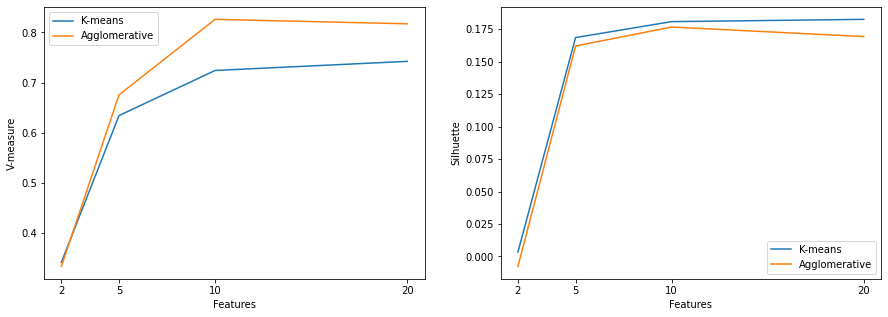

In [313]:
rng = [2,5,10,20]
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))
plt.xticks(rng)

ax1.plot(rng, KM_v_measure_scores)
ax1.plot(rng, AC_v_measure_scores)
ax1.legend(['K-means', 'Agglomerative'])
ax1.set_xlabel('Features')
ax1.set_ylabel('V-measure')
ax1.set_xticks(rng)

ax2.plot(rng, KM_silhuette_scores)
ax2.plot(rng, AC_silhuette_scores)
ax2.legend(['K-means', 'Agglomerative'])
ax2.set_xlabel('Features')
ax2.set_ylabel('Silhuette')
ax2.set_xticks(rng);

**The best v-measure and silhuette values for original data are about 0.9 and 0.19 accordingly, best ones after docomposition are 0.8 and 0.175. Therefore dimension reduction slightly worsens metrics, but seems like nothing terrible concidering quite huge compression from 64 to 10.**

Другая популярная техника снижения размерности, которая особенно хорошо подходит для работы с картинками, – это алгоритм t-distributed stochastic neighbor embeddings, сокращённо tSNE. В отличие от сингулярного разложения, это преобразование нелинейное. Его основная идея – отобразить точки из пространства размерности $d$ в пространство размерности 2 или 3 (обычно 2, то есть на плоскость) таким образом, чтобы как можно точнее сохранить расстояния. Математические детали есть, например, [здесь](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding), но они нетривиальны.

В библиотеке scikit-learn реализацией tSNE является класс `TSNE` в подмодуле `manifold`. В конструктор можно передать параметр `n_components`, а можно и не передавать: по умолчанию он равен 2. Метод `fit_transform` работает аналогично тому, как и у `TruncatedSVD`.

<u>Замечание:</u> В последние годы вместо tSNE на практике часто используется [UMAP](https://github.com/lmcinnes/umap), более быстрый алгоритм с похожими свойствами. В этой лабораторной работе не предлагается использовать UMAP, так как это потребовало бы установить ещё одну зависимость -- библиотеку `umap-learn`. Желающие могут проделать задания на tSNE с использованием UMAP; в этом случае обратите внимание на параметры `n_neighbors` и `min_dist`, которыми определяется вид проекции.

**(0.5 балла)** Выполните tSNE-преобразование матрицы `X`, оставив 2 признака. Визуализируйте данные, преобразованные таким образом, в виде точечной диаграммы: первый признак вдоль горизонтальной оси, второй признак вдоль вертикальной оси. Подсветите разными цветами группы точек, соответствующих разным цифрам.

*Указания:*
- Точечную диаграмму умеет рисовать функция `plt.scatter`. Ознакомьтесь со справкой к ней.
- За цвета точек отвечает параметр `c` у функции `plt.scatter`. Передать в него надо истинные метки классов.

In [14]:
from sklearn.manifold import TSNE
transformed_data = TSNE().fit_transform(digits.data)

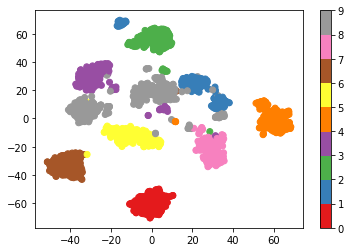

In [35]:
plt.scatter(transformed_data[:,0], transformed_data[:,1], c=digits.target, cmap='Set1')
plt.colorbar();

**(1 балл)** Для tSNE-преобразованных данных с 2 признаками выполните иерархическую и $K$-means кластеризацию (число кластеров примите равным 10). Посчитайте значения силуэта и $V$-меры. Удалось ли получить силуэт и / или $V$-меру лучше, чем на исходных данных?

In [73]:
#predictions for tSNE transformed data
KM_tSNE_prediction = KMeans(10).fit_predict(transformed_data)
AC_tSNE_prediction = AgglomerativeClustering(10).fit_predict(transformed_data)

In [74]:
#scores for it
KM_tSNE_v_measure_score = v_measure_score(digits.target, KM_prediction)
AC_tSNE_v_measure_score = v_measure_score(digits.target, AC_prediction)

KM_tSNE_silhuette_score = silhouette_score(digits.data, KM_prediction)
AC_tSNE_silhuette_score = silhouette_score(digits.data, AC_prediction)

In [75]:
#predictions for original data
KM_orig_prediction = KMeans(10).fit_predict(digits.data)
AC_orig_prediction = AgglomerativeClustering(10).fit_predict(digits.data)

In [76]:
#scores for it
KM_orig_v_measure_score = v_measure_score(digits.target, KM_orig_prediction)
AC_orig_v_measure_score = v_measure_score(digits.target, AC_orig_prediction)

KM_orig_silhuette_score = silhouette_score(digits.data, KM_orig_prediction)
AC_orig_silhuette_score = silhouette_score(digits.data, AC_orig_prediction)

In [77]:
#is tSNE transformed data better for score metrics then original one? let's figure it out
index = pd.MultiIndex.from_product([['KM', 'AC'], ['silhuette', 'v-measure']], names=['clustering', 'score'])

data = [[KM_orig_silhuette_score, KM_tSNE_silhuette_score],
        [KM_orig_v_measure_score, KM_tSNE_v_measure_score],
        [AC_orig_silhuette_score, AC_tSNE_silhuette_score],
        [AC_orig_v_measure_score, AC_tSNE_v_measure_score]]

total = pd.DataFrame(data=data, index=index, columns=['original', 'tSNE'])
total
#yeah, a bit fancy, but I was in the mood

original      tSNE
clustering score                        
KM         silhuette  0.182416  0.163699
           v-measure  0.740945  0.907551
AC         silhuette  0.178497  0.163787
           v-measure  0.868170  0.910881

**As we can see tSNE have decreased silhuette values in both K-means and Agglomerative clustering. However, V-measure was increaced for both algorithms.**

**(0.5 балла)** Для самого лучшего разбиения, которое вам удалось получить (на ваше усмотрение, лучшего в терминах силуэта или $V$-меры), опять визуализируйте картинками центры кластеров. Удалось ли добиться, чтобы каждый кластер соответствовал какой-нибудь одной цифре?

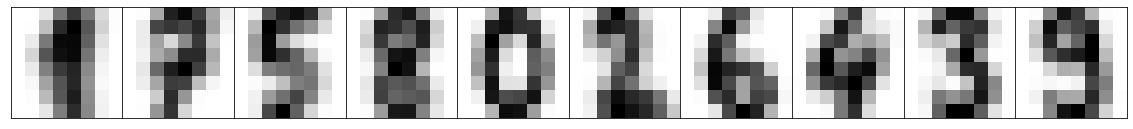

In [83]:
#lets use V-measure to select the best prediction. And it is Agglomerative clustering on tSNE dataset
plot_cluster_center(AC_tSNE_prediction)

**Sooo, feels like good enough. I can clearly distinguish every digit. Anyway definitely isn't worse then my previous favorite K-means on original data.**

# 4. Итоги, бонус

**(1 балл)** Напишите в свободной форме, какие выводы вы сделали из выполненной работы. Ответьте, как минимум, на следующие два вопроса:
- Какой из двух методов даёт более осмысленные кластеры – иерархическая кластеризация или алгоритм $K$ средних? Зависит ли это от настроек каждого алгоритма? От критериев оценивания качества?
- Удаётся ли улучшить качество кластеризации, снижая размерность признакового пространства?

**If we choose to rely on more complex metric such V-measure, then Agglomerative clustering shows slightly better results with tSNE and significantly better with original dataset. While silhuette metric differs not so much across various combinations of clustering algorithms and dataset transformations.<br>**
**As for dimension reduction intuitively seems like the more dimensions(features) you have the more accurate should be any prediction. It was kinda surprise for me that it actually makes clusterization algorithms perform better.**

**(Бонусные 2 балла)** Скачайте датасет [MNIST Handwritten Digits](http://yann.lecun.com/exdb/mnist). Как сделать это с помощью scikit-learn, написано [здесь](https://stackoverflow.com/a/60450028). MNIST Handwritten Digits – это 70 тысяч распознанных рукописных изображений цифр, каждое размером 28 $\times$ 28 пикселей. Попробуйте прокластеризовать этот датасет и добиться как можно лучших значений силуэта и $V$-меры.

In [109]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [95]:
images = X.values.reshape(X.shape[0], 28, 28)

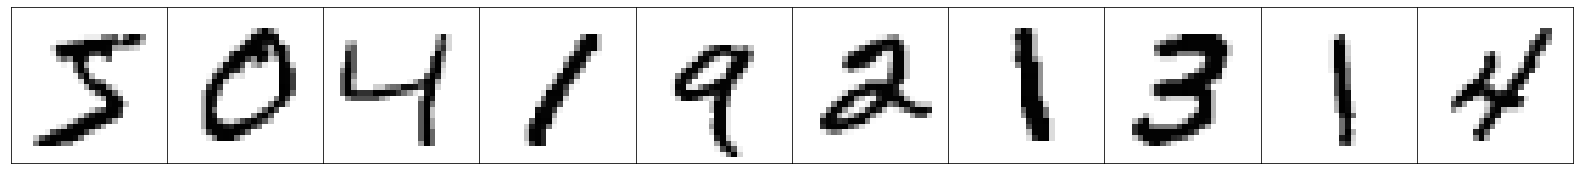

In [103]:
fig, _ = plt.subplots(ncols=10, figsize=(28,28), gridspec_kw = {'wspace':0})

axes = fig.get_axes()
for ax, im in zip(axes, images):
    ax.set(xticks=[], yticks=[])
    ax.imshow(16-im, interpolation=None);

In [111]:
transformed_data = TSNE().fit_transform(X)
#daaaamn, it takes forever on my pc

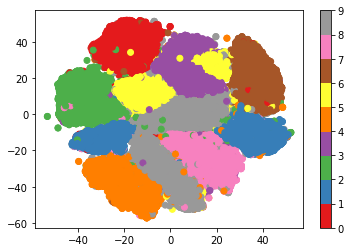

In [138]:
#it's been about half an our since last comment
plt.scatter(transformed_data[:,0], transformed_data[:,1], c=y.astype(int).values, cmap='Set1')
plt.colorbar();

In [183]:
#every 10 because i don't have 20gb ram
AC_prediction = AgglomerativeClustering(n_clusters=10).fit_predict(transformed_data[::10])

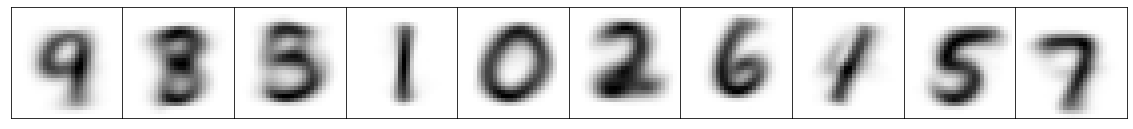

In [184]:
center = [X[::10][AC_prediction == i].mean(axis=0) for i in np.unique(AC_prediction)]

fig, _ = plt.subplots(ncols=10, figsize=(20,20), gridspec_kw = {'wspace':0})
axes = fig.get_axes()

for ax, im in zip(axes, center):
    ax.set(xticks=[], yticks=[])
    ax.imshow(16-im.values.reshape(28,28), interpolation=None)

In [ ]:
#mmm it's ever readable, impressive
#now metrics

AC_v_measure_score = v_measure_score(y.astype(int).values[::10], AC_prediction)
AC_silhuette_score = silhouette_score(X[::10], AC_prediction) #this feels reeeaaally looong, please end
print(AC_v_measure_score)                                     #I don't want to wait another half-our
print(AC_silhuette_score)                                     #*one eternity later*
                                                              #is it too late to stop or too early?
                                                              #to be or not to be?
                                                              #it doesn't matter anymore, I don't want to think
                                                              #how close I am, I just want it stop

In [ ]:
print(AC_v_measure)